# Locally Linear Embedding

(Roweis & Saul, 2000) <br>

LLE è un metodo non-lineare per la riduzione della dimensionalità, che può essere usato per manifold embedding e feature extraction. <br>
Mira a preservare la struttura dei dati: punti vicini nello spazio iniziale saranno essere vicini anche nello spazio finale, puntando anche ad allontanare ulteriormente i punti lontani. <br>

I dati ad alta dimensionalità spesso seguono una struttura curva (o in generale non-lineare) a bassa dimensionalità, come Swiss Roll o la Spirale Logaritmica, ed è qui che algoritmi come LLE danno i loro risultati migliori.

![caption](files/media/fig_1.png)

*Esempio di riduzione della dimensionalità da 2 a 1, basata sui vicini.*

## 3 steps

LLE si può suddividere in 3 step:
 1. Trovare il k-Nearest Neighbors (kNN) graph di tutti i punti in questione
 2. Trovare i pesi per poter ricostruire ogni punto in base ai suoi vicini, usando una combinazione lineare (linear reconstruction)
 3. Usando gli stessi pesi, fare l'embedding di ogni punto basandosi su una combinazione lineare dell'embedding dei suoi vicini (linear embedding)

L'idea principale di LLE è usare gli stessi pesi sia nello spazio ad alta dimensionalità (input) che in quello a bassa dimensionalità (output).

![caption](files/media/fig_2.png)

$ n $ : numero dei dati <br>
$ d $ : dimensione iniziale <br>
$ p $ : dimensione finale, solitamente $ p << d $ <br>
<br>

Dati originali (input): $ \large \{  x_i \in \mathbb R^d \}^n_{i=1} $ <br>
Dati finali (output): $ \large \{ y_i \in \mathbb R^p \}^n_{i=1} $ <br> 
<br>

$ k $ : numero dei vicini da considerare <br>

## ( 1 ) k-Nearest Neighbors

Un grafo dei vicini (kNN graph) è formato usando la distanza euclidea tra coppie di punti, quindi ogni punto avrà $ k $ vicini.
<br>

Indichiamo il j-esimo vicino di $ x_i $ con 
$$
\large x_{ij} \in \mathbb R^d 
$$  <br>
e i vicini di $ x_i $ con 
$$
\large N_i := \begin{bmatrix} x_{i1} & \dots & x_{ik} \end{bmatrix} \quad ( d \times k )
$$ <br>


## ( 2 ) Linear Reconstruction by the neighbors

L'obiettivo di questo step è trovare la matrice dei pesi che minimizza l'errore per la ricostruzione di ogni punto a partire dai suoi kNN. <br>

Vogliamo esprimere $ x_i $ come somma pesata dei suoi $ k $ vicini

$$
\large x_i \approx \sum_{j \in N_i}w_{ij}x_j
$$

La somma dei i pesi $ w_{ij} $ relativi a un punto deve essere uguale ad 1, così da rendere possibili successive semplificazioni.

$$
\large \sum_{j \in N_i}w_{ij} = 1, \quad \forall i \in {1, \dots, n}
$$

Indichiamo con $ \mathbf w_i $ i $ k $ pesi relativi al punto $ x_i $

$$
\large \mathbf w_i = \begin{bmatrix} w_{i1} \\ \vdots \\ w_{ik} \end{bmatrix} \quad ( k \times 1 )
$$

Per trovare i pesi corretti, dobbiamo minimizzare l'errore:

$$
\large \text {minimize: } \left\| x_i - \sum_{j \in N_i}w_{ij}x_j \right\|^2
$$

Dichiariamo ora una nuova matrice nella quale prendo i vicini di $ x_i $ e gli sottraggo $ x_i $:

$$
\large \mathbf Z_i \leftarrow \begin{bmatrix} (x_1 - x_i) & \dots & (x_j - x_i) & \dots & (x_k - x_i) \end{bmatrix}
\quad ( d \times k )
$$

Dopo alcuni passaggi operando con matrici si arriva finalmente a trovare $ \mathbf w_i $, ovvero i pesi relativi a $ x_i $:

$$
\large \mathbf w_i = \dfrac{\mathbf G_i^{-1}\mathbf 1}{\mathbf 1^\top \mathbf G_i^{-1}\mathbf 1}
$$

, dove $ \large \mathbf G_i $ è una matrice di Gram (simmetrica reale) così ottenuta 

$$
\large \mathbf G_i = \mathbf Z_i^\top \mathbf Z_i \quad ( k \times k )
$$

<br>

Ogni punto è ora ricostruibile usando i pesi.

## ( 3 ) Linear Embedding

Nel secondo step abiamo trovato i pesi per la linear reconstruction, quindi non abbiamo più bisogno degli input. <br>
Fissiamo i pesi e cerchiamo $ \mathbf y_i $, ovvero le coordinate di dimensionalità ridotta che minimizzano il reconstruction error. <br>
Lo scopo è quindi di "embeddare" i dati in uno spazio dimensionale più piccolo usando gli stessi pesi dello spazio di input. <br>

Come con le $ x_i $, vogliamo esprimere $ y_i $ come somma pesata dei suoi $ k $ vicini

$$
\large y_i \approx \sum_{j \in N_i}w_{ij}y_j
$$

Definiamo la matrice dei pesi 

$$ \large \mathbf W \quad ( n \times n ) \quad , \quad
\large
   w_{ij} =
    \left\{
    \begin{array}{ll}
       0 & \mbox{se } j = i\\
       w_{ij} & \mbox{se } j \in N_i\\
       0 & \mbox{se } j \not\in N_i
    \end{array}
   \right.
$$

La riga i-esima di $ \mathbf W $ rappresenta i pesi dell' i-esimo punto.
Ogni riga ha $ n $ valori, alcuni dei quali posti a zero, eccetto nelle $ k $ colonne corrispondenti al vicinato di $ x_i $ ( $ N_i $ ); inoltre la somma di ogni riga è uguale a 1, per via della condizione posta all'inizio del calcolo dei pesi.


Definiamo la matrice delle coordinate $ \mathbf Y $ :

$$
\large \mathbf Y = \begin{bmatrix} y_1 & \dots & y_n \end{bmatrix}^\top \quad ( n \times p )
$$

Ogni riga $ \mathbf Y_i $ è l'embedding nello spazio ridotto del punto, trasposto ($ p $ dimensionale)


Abbiamo un problema di ottimizzazione in cui vogliamo minimizzare il "reconstruction error", per ottenere $ \mathbf Y $:

$$
\large \text {minimize: } \sum_{i} \left\| y_i - \sum_{j \in N_i}w_{ij}x_y \right\|^2
$$

Abbiamo 2 vincoli da rispettare (per rendere possibili i passaggi matematici del procedimento):

$$
\large \dfrac{1}{n} \sum_{i} y_i y_i^\top = \mathbf I \\
\large \sum_{i} y_i = \mathbf 0
$$

Consideriamo infine la matrice $ \mathbf M $:

$$
\large \mathbf M = ( \mathbf I - \mathbf W )^\top ( \mathbf I - \mathbf W ) \quad ( n \times n )
$$

<br>

Di essa calcoliamo <b>autovalori</b> e <b>autovettori</b> al fine di estrarre le $ p $ componenti principali.<br>

$$
\large \lambda_0 \dots \lambda_n \quad e \quad \mathbf v_0 \dots \mathbf v_n \quad di \quad \mathbf M
$$

La matrice $ \mathbf M $ è una matrice $ ( n \times n ) $ che ha, in generale, $ n $ autovalori. <br>
Ordiniamo gli autovettori in base all'autovalore dal più piccolo al più grande, in quanto il problema originario era di minimizzazione, e scartiamo il primo, dato che è pari a zero.<br>

Consideriamo quindi i successivi $ p $ autovettori con autovalori non nulli, che saranno le colonne di 
$ \large \mathbf Y \in \mathbb R^{n \times p} $
<br>

$$
\large \mathbf Y \leftarrow \begin{bmatrix} \mathbf v_1 & \dots & \mathbf v_n \end{bmatrix}
$$

## Riassumendo LLE

<font size="3">

- input: $ \{  x_i \in \mathbb R^d \}^n_{i=1} $
    <br><br>
- $ \forall x_i $ :
    <br><br>
  - trovo $ N_i $
  - $ \mathbf Z_i \leftarrow \begin{bmatrix} \dots & x_j - x_i & \dots \end{bmatrix} $
  - $ \mathbf G_i \leftarrow \mathbf Z_i^\top \mathbf Z_i $
  - $ \mathbf w_i \leftarrow \dfrac{\mathbf G_i^{-1}\mathbf 1}{\mathbf 1^\top \mathbf G_i^{-1}\mathbf 1} $
    <br><br>
- costruisco $ \mathbf W $
    <br><br>
- $ \mathbf M \leftarrow ( \mathbf I - \mathbf W )^\top ( \mathbf I - \mathbf W ) $
    <br><br>
- $ \lambda_0 \dots \lambda_n \enspace e \enspace \mathbf v_0 \dots \mathbf v_n \enspace di \enspace \mathbf M $, ordinati in base a $ \lambda_i $
    <br><br>
- $ \mathbf Y \leftarrow \begin{bmatrix} \mathbf v_1 & \dots & \mathbf v_n \end{bmatrix} $

</font>

# E ora un po' di codice ...

In [1]:
import numpy as np
from sklearn.datasets import load_digits, make_swiss_roll
from sklearn import manifold
from sklearn.manifold import LocallyLinearEmbedding
from matplotlib import offsetbox
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import time

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [20, 10]

In [2]:
digits = load_digits()

X_digits = digits.data

# campioni: 1797
# dimens.:    64 (immagine 8x8)

y_digits = digits.target

# classi:     10 (le cifre da 0 a 9)

In [3]:
digits_df = pd.DataFrame(X_digits)
digits_df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


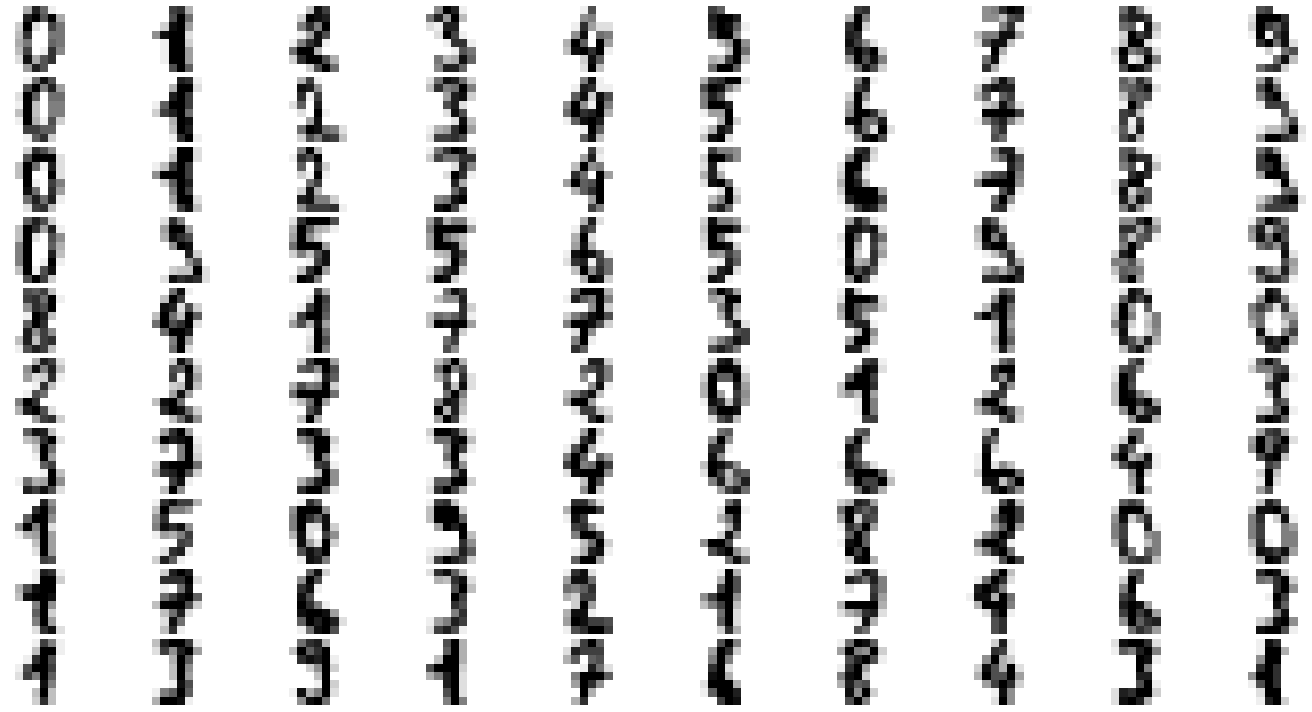

In [4]:
# mostro qualche cifra (100) del dataset

fig, ax_array = plt.subplots(10, 10)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap=plt.cm.binary)

plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

In [5]:
def disegna (X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Spectral', s=5)
    plt.gca().set_aspect('equal', 'datalim')
    plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
    plt.title(title, fontsize=24)
    plt.show()

def elabora_lle_2c (X, n_neighbors):
    startTime = time.time()
    reduced, err = manifold.locally_linear_embedding(X, n_neighbors=n_neighbors, n_components=2)
    my_time = time.time() - startTime
    
    title = f'LLE embedding (n_neighbors: {n_neighbors}, time: {round(my_time, 3)}s)'
    disegna(reduced, y_digits, title=title)
    
    print(f"n_neighbors: {n_neighbors}")
    print(f"Time: {round(my_time, 3)}s")
    print(f"Reconstruction error for the embedding vectors: {err}")

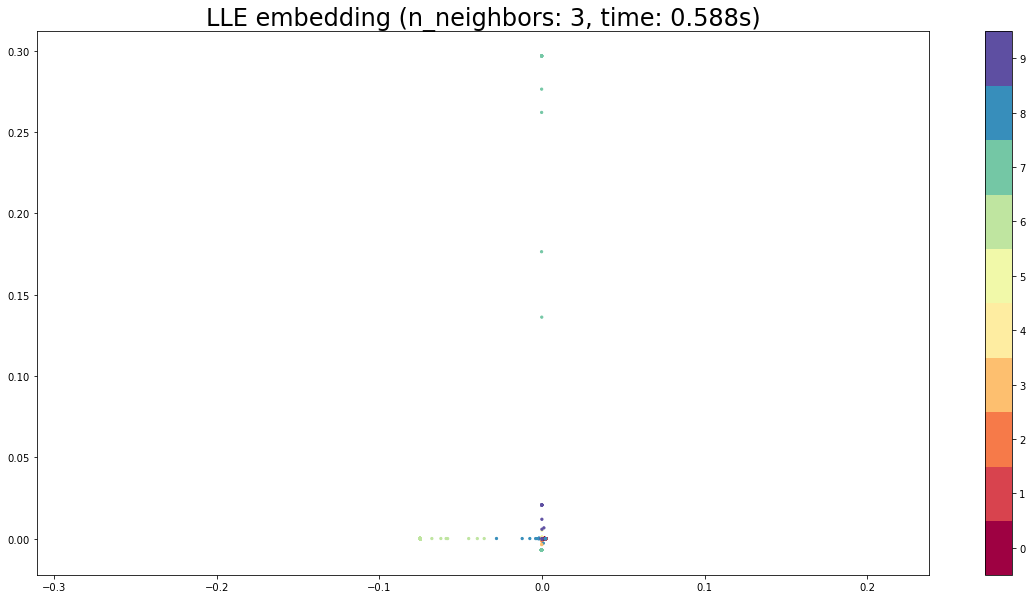

n_neighbors: 3
Time: 0.588s
Reconstruction error for the embedding vectors: -5.775098401603412e-19


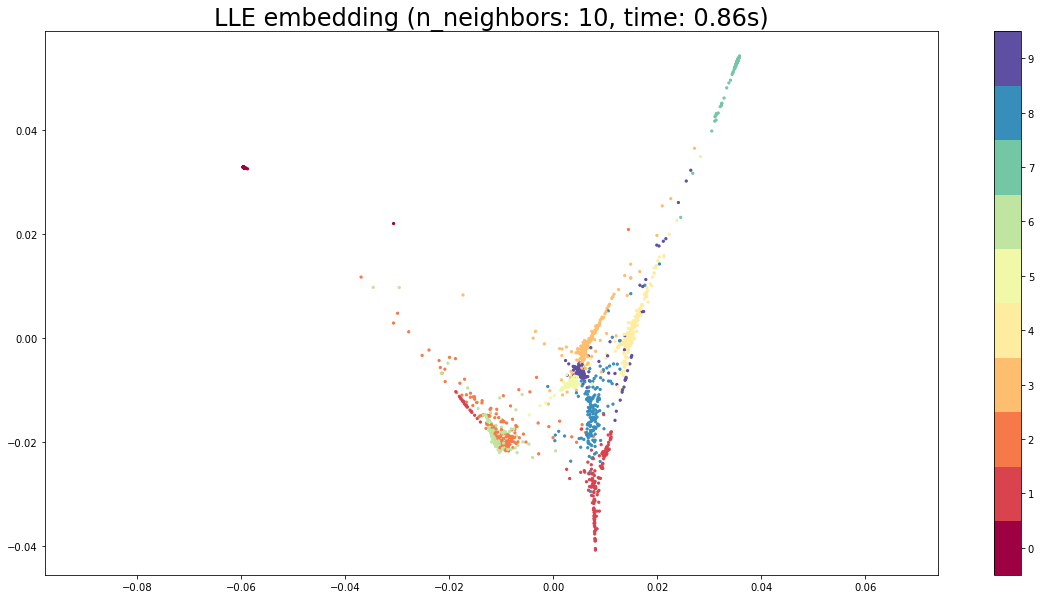

n_neighbors: 10
Time: 0.86s
Reconstruction error for the embedding vectors: 1.0845812141572339e-06


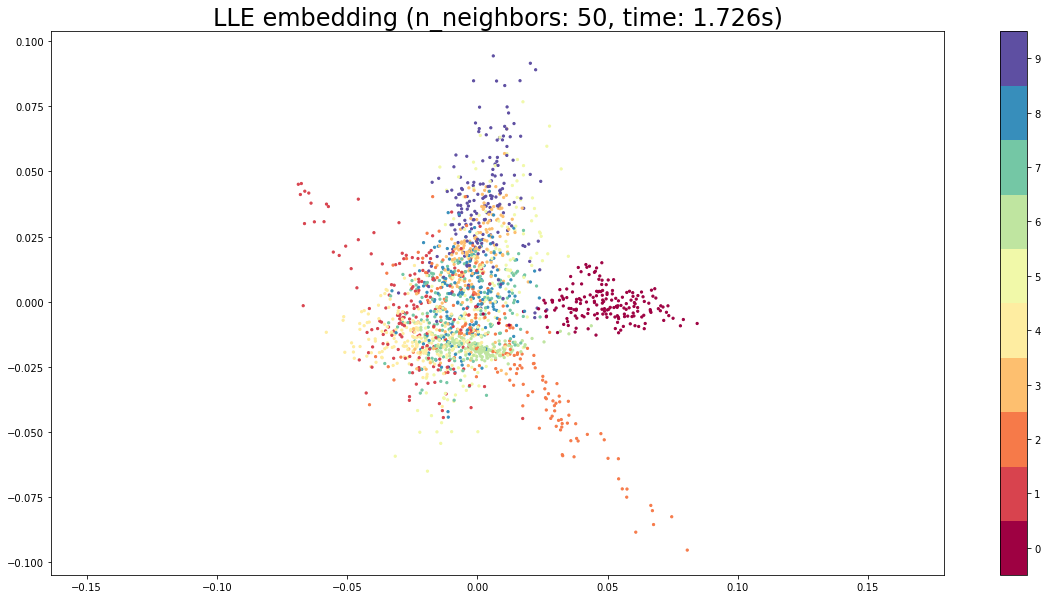

n_neighbors: 50
Time: 1.726s
Reconstruction error for the embedding vectors: 3.1099598127584204e-06


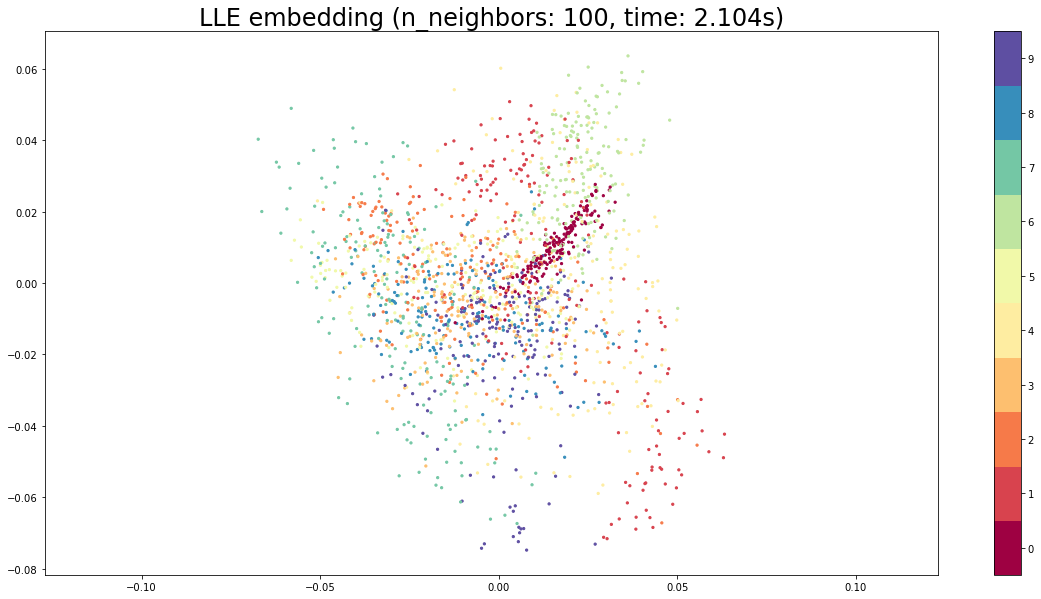

n_neighbors: 100
Time: 2.104s
Reconstruction error for the embedding vectors: 3.787129082329358e-05


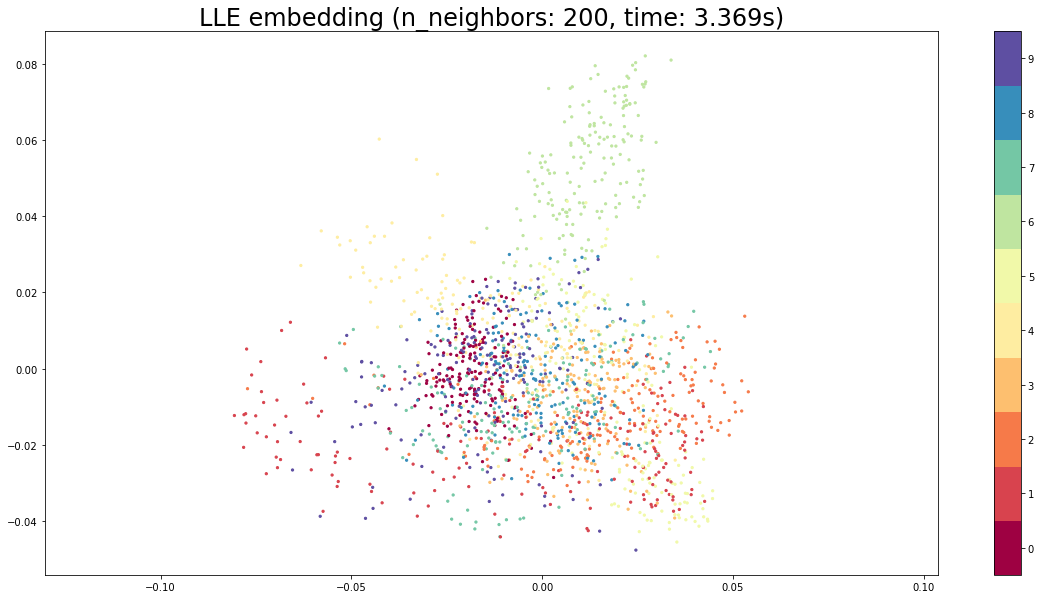

n_neighbors: 200
Time: 3.369s
Reconstruction error for the embedding vectors: 9.083990632521787e-05


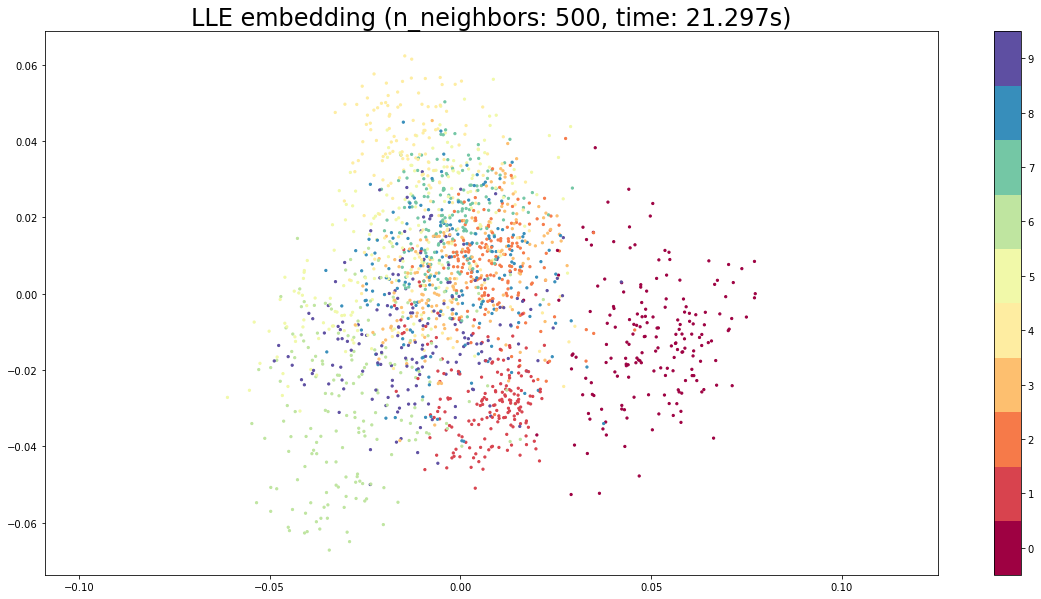

n_neighbors: 500
Time: 21.297s
Reconstruction error for the embedding vectors: 0.00012923720098723254


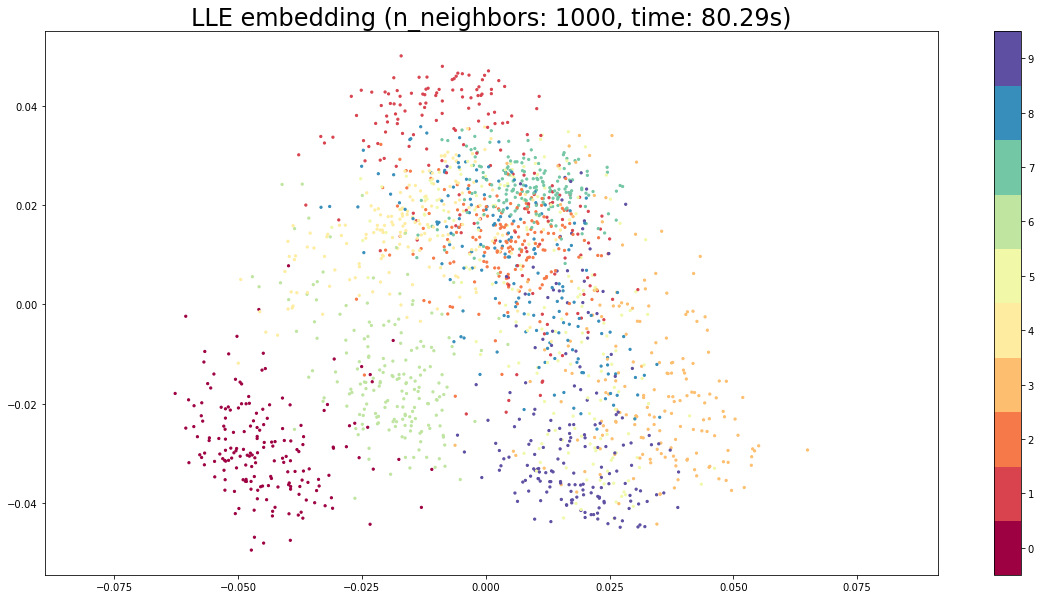

n_neighbors: 1000
Time: 80.29s
Reconstruction error for the embedding vectors: 0.0004886329249593267


In [6]:
neighbors = 3
elabora_lle_2c(X_digits, neighbors)

# -------------------------------------------------

neighbors = 10
elabora_lle_2c(X_digits, neighbors)

# -------------------------------------------------

neighbors = 50
elabora_lle_2c(X_digits, neighbors)

# -------------------------------------------------

neighbors = 100
elabora_lle_2c(X_digits, neighbors)

# -------------------------------------------------

neighbors = 200
elabora_lle_2c(X_digits, neighbors)

# -------------------------------------------------

neighbors = 500
elabora_lle_2c(X_digits, neighbors)

# -------------------------------------------------

neighbors = 1000
elabora_lle_2c(X_digits, neighbors)


In [7]:
def interact_lle(x):
    elabora_lle_2c(X_digits, x)

In [8]:
interact(interact_lle, x=widgets.IntSlider(min=5, max=100, step=5, value=50))

interactive(children=(IntSlider(value=50, description='x', min=5, step=5), Output()), _dom_classes=('widget-in…

<function __main__.interact_lle(x)>

In [9]:
def disegna_3d (X, y, title):
    fig = plt.figure()
    ax = Axes3D(fig)
    p = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='Spectral', s=5)
    fig.colorbar(p, boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
    plt.title(title, fontsize=24)
    plt.show()

def elabora_lle_3c (X, n_neighbors):
    startTime = time.time()
    reduced, err = manifold.locally_linear_embedding(X, n_neighbors=n_neighbors, n_components=3)
    my_time = time.time() - startTime
    
    title = f'LLE embedding (n_neighbors: {n_neighbors}, time: {round(my_time, 3)}s)'
    disegna_3d(reduced, y_digits, title=title)
    
    print(f"n_neighbors: {n_neighbors}")
    print(f"Time: {round(my_time, 3)}s")
    print(f"Reconstruction error for the embedding vectors: {err}")

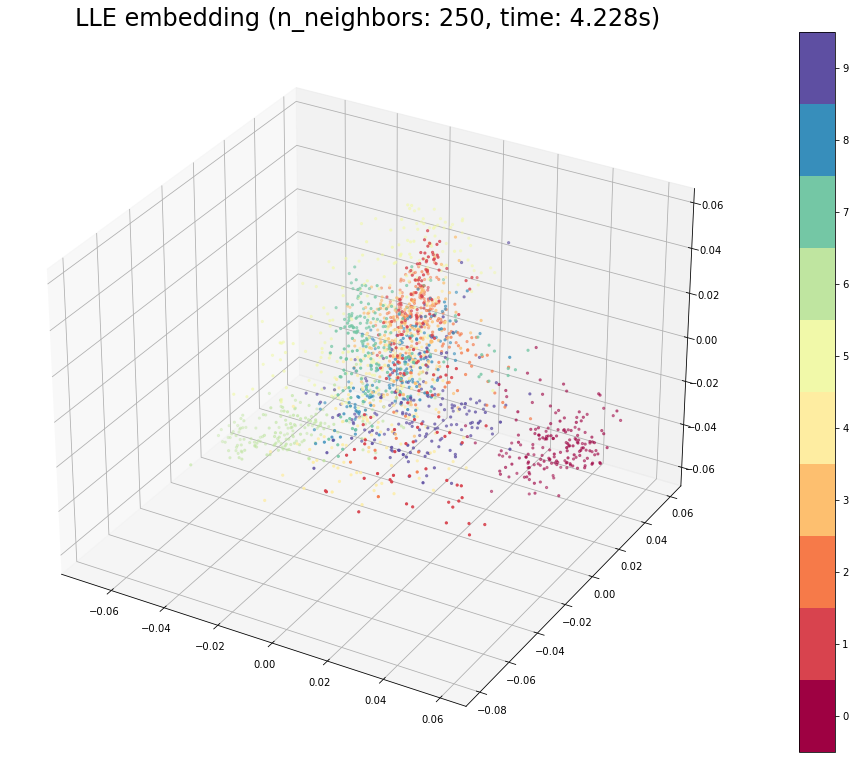

n_neighbors: 250
Time: 4.228s
Reconstruction error for the embedding vectors: 0.00019144486954926726


In [10]:
neighbors = 250
elabora_lle_3c(X_digits, neighbors)

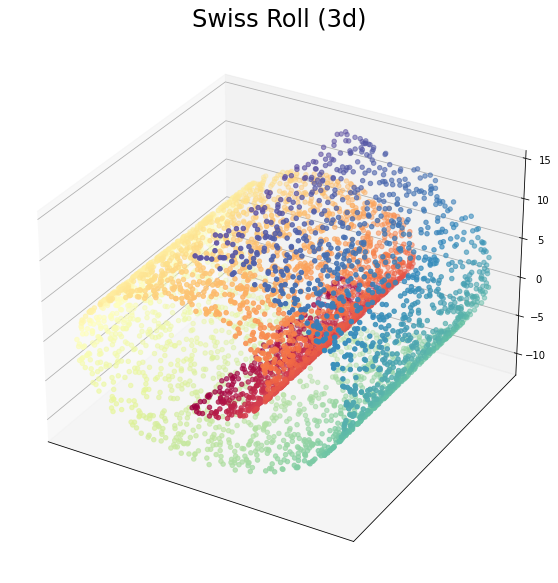

In [28]:
# Swiss Roll

sr_X, sr_y = make_swiss_roll(n_samples=5000)

fig = plt.figure()

# 3d
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sr_X[:, 0], sr_X[:, 1], sr_X[:, 2], c=sr_y, cmap="Spectral")
ax.set_title("Swiss Roll (3d)", fontsize=24)
plt.axis('tight')
plt.xticks([]), plt.yticks([])

plt.show()

Reconstruction error (standard): 4.407252850326102e-07
Reconstruction error (hessian): 4.407252850326102e-07
Reconstruction error (modified): 4.407252850326102e-07
Reconstruction error (ltsa): 4.407252850326102e-07


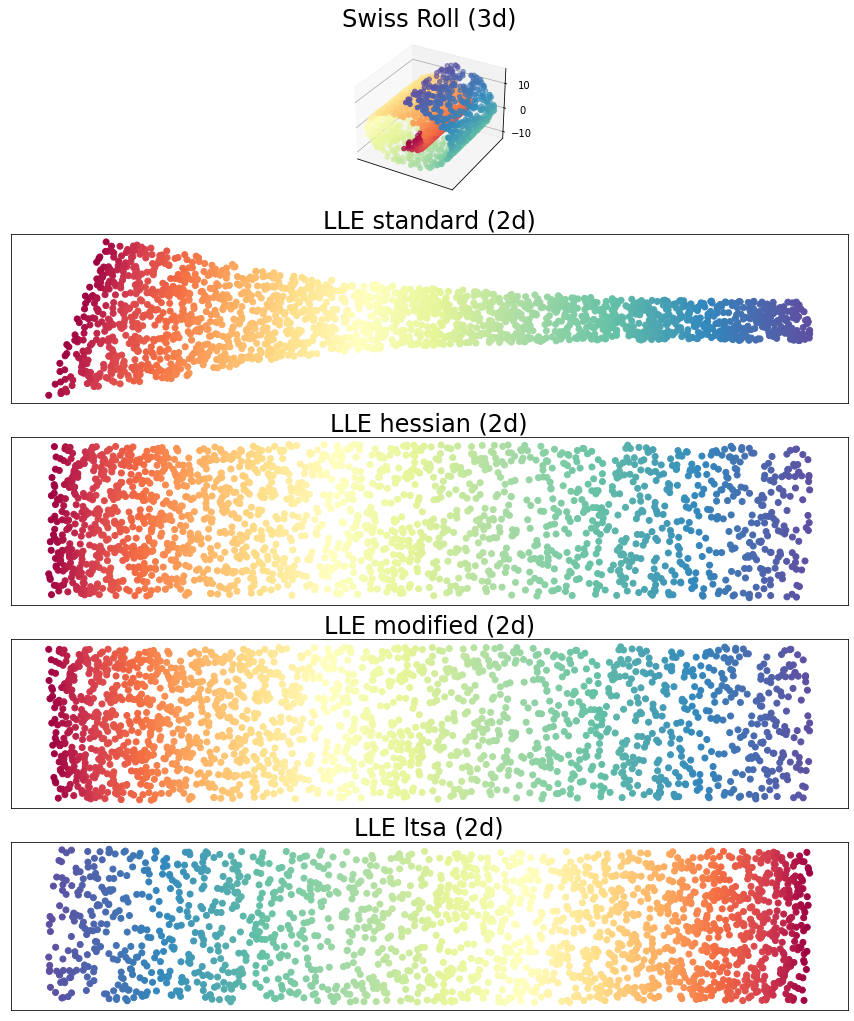

In [23]:
sr_X, sr_y = make_swiss_roll(n_samples=2000)

sr_red_standard, err = manifold.locally_linear_embedding(sr_X, n_neighbors=12, n_components=2, method="standard")
sr_red_hessian, err = manifold.locally_linear_embedding(sr_X, n_neighbors=12, n_components=2, method="hessian")
sr_red_modified, err = manifold.locally_linear_embedding(sr_X, n_neighbors=12, n_components=2, method="modified")
sr_red_ltsa, err = manifold.locally_linear_embedding(sr_X, n_neighbors=12, n_components=2, method="ltsa")

#----------------------------------------------------------------------

fig = plt.figure()
fig.set_size_inches(15, 18)

# 3d
ax = fig.add_subplot(511, projection='3d')
ax.scatter(sr_X[:, 0], sr_X[:, 1], sr_X[:, 2], c=sr_y, cmap="Spectral")
ax.set_title("Swiss Roll (3d)", fontsize=24)
plt.axis('tight')
plt.xticks([]), plt.yticks([])

# 2d standard
ax = fig.add_subplot(512)
ax.scatter(sr_red_standard[:, 0], sr_red_standard[:, 1], c=sr_y, cmap="Spectral")
ax.set_title('LLE standard (2d)', fontsize=24)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
print(f"Reconstruction error (standard): {err}")

# 2d hessian
ax = fig.add_subplot(513)
ax.scatter(sr_red_hessian[:, 0], sr_red_hessian[:, 1], c=sr_y, cmap="Spectral")
ax.set_title('LLE hessian (2d)', fontsize=24)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
print(f"Reconstruction error (hessian): {err}")

# 2d modified
ax = fig.add_subplot(514)
ax.scatter(sr_red_modified[:, 0], sr_red_modified[:, 1], c=sr_y, cmap="Spectral")
ax.set_title('LLE modified (2d)', fontsize=24)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
print(f"Reconstruction error (modified): {err}")

# 2d itsa
ax = fig.add_subplot(515)
ax.scatter(sr_red_ltsa[:, 0], sr_red_ltsa[:, 1], c=sr_y, cmap="Spectral")
ax.set_title('LLE ltsa (2d)', fontsize=24)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
print(f"Reconstruction error (ltsa): {err}")

plt.show()

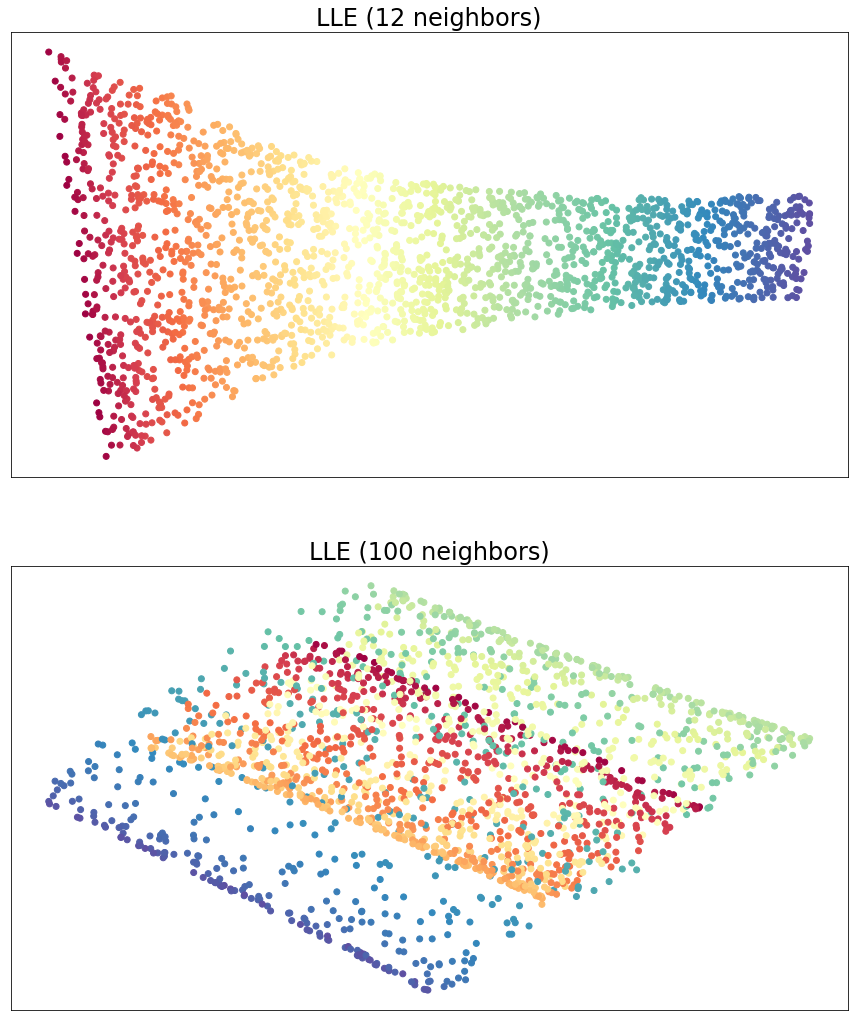

In [26]:
sr_red_12, err = manifold.locally_linear_embedding(sr_X, n_neighbors=12, n_components=2, method="standard")
sr_red_100, err = manifold.locally_linear_embedding(sr_X, n_neighbors=100, n_components=2, method="standard")

#----------------------------------------------------------------------

fig = plt.figure()
fig.set_size_inches(15, 18)

# 12 neighbors
ax = fig.add_subplot(211)
ax.scatter(sr_red_12[:, 0], sr_red_12[:, 1], c=sr_y, cmap="Spectral")
ax.set_title('LLE (12 neighbors)', fontsize=24)
plt.axis('tight')
plt.xticks([]), plt.yticks([])

# 50 neighbors
ax = fig.add_subplot(212)
ax.scatter(sr_red_100[:, 0], sr_red_100[:, 1], c=sr_y, cmap="Spectral")
ax.set_title('LLE (100 neighbors)', fontsize=24)
plt.axis('tight')
plt.xticks([]), plt.yticks([])

plt.show()